<>:11: SyntaxWarning: invalid escape sequence '\A'
<>:11: SyntaxWarning: invalid escape sequence '\A'
C:\Users\alapr\AppData\Local\Temp\ipykernel_22760\3800766442.py:11: SyntaxWarning: invalid escape sequence '\A'
  input_path = os.path.join("archive\AVM\AVM_2024-08-07-08-01-08_23124.bmp")


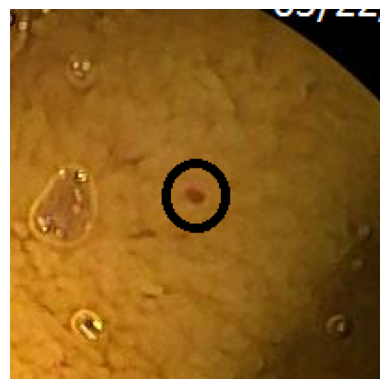

In [23]:
import os
import cv2
import numpy as np

# Ścieżki

# Domyślny promień (jeśli elipsa nie zostanie znaleziona)
default_radius = 100


input_path = os.path.join("archive\AVM\AVM_2024-08-07-08-01-08_23124.bmp")

# Wczytaj obraz
image = cv2.imread(input_path)
h, w = image.shape[:2]

# Znajdź kontury
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Progowanie ciemnych pikseli (elipsy)
_, thresh = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours = sorted(contours, key=cv2.contourArea, reverse=True)
# Sortuj kontury po powierzchni (malejąco)

center = (w // 2, h // 2)
radius = default_radius

# Szukaj odpowiedniego konturu
for cnt in contours[2:]:  # pomijamy pierwszy (obramowanie)
    area = cv2.contourArea(cnt)
    if 50 < area < 30000:  # możesz dostroić te liczby
        (x, y), found_radius = cv2.minEnclosingCircle(cnt)
        center = (int(x), int(y))
        radius = default_radius # np. powiększ minimalnie
        break

# Wycinanie fragmentu
x1 = max(center[0] - radius, 0)
y1 = max(center[1] - radius, 0)
x2 = min(center[0] + radius, w)
y2 = min(center[1] + radius, h)

cropped = image[y1:y2, x1:x2]


import matplotlib.pyplot as plt

# Konwersja z BGR (OpenCV) na RGB (matplotlib)
cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)

plt.imshow(cropped_rgb)
plt.axis('off')  # Ukrywa osie
plt.show()


In [32]:
import os
import cv2
import numpy as np

# Ścieżka do folderu z oryginalnymi obrazami
input_root = "archive"
output_root = "cropped_output"

# Wymiary obrazków i granica (wyznaczona metodą prób i błędów)
h, w = (512, 512)
margin_x = int(w * 0.064)
margin_y = int(h * 0.064)

# Domyślny promień, jeśli nie znajdziemy nic
default_radius = 200

def process_and_crop_photos():
    for root, _, files in os.walk(input_root):
        i = 0
        for file in files:
            if i > 0:
                break
            i += 1
            if file.endswith(".bmp"):
                input_path = os.path.join(root, file)

                # Odtworzenie struktury katalogów w output
                relative_path = os.path.relpath(root, input_root)
                output_dir = os.path.join(output_root, relative_path)
                os.makedirs(output_dir, exist_ok=True)

                base, ext = os.path.splitext(file)
                new_filename = f"{base}{ext}"
                output_path = os.path.join(output_dir, new_filename)

                image = cv2.imread(input_path)
                height, width = image.shape[:2]

                # 1. Usunięcie obramowania
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                mask = np.ones_like(gray, dtype=np.uint8) * 255
                mask[:margin_y, :] = 0
                mask[-margin_y:, :] = 0
                mask[:, :margin_x] = 0
                mask[:, -margin_x:] = 0

                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # Progowanie ciemnych pikseli (elipsy)
                _, thresh = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY_INV)

                contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

                contours = sorted(contours, key=cv2.contourArea, reverse=True)
                # Sortuj kontury po powierzchni (malejąco)

                center = (w // 2, h // 2)
                radius = default_radius

                # Szukaj odpowiedniego konturu
                for cnt in contours[2:]:  # pomijamy pierwszy (obramowanie)
                    area = cv2.contourArea(cnt)
                    if 50 < area < 30000:  # możesz dostroić te liczby
                        (x, y), found_radius = cv2.minEnclosingCircle(cnt)
                        center = (int(x), int(y))
                        radius = default_radius # np. powiększ minimalnie
                        break

                # Wycinanie fragmentu
                x1 = max(center[0] - radius, 0)
                y1 = max(center[1] - radius, 0)
                x2 = min(center[0] + radius, w)
                y2 = min(center[1] + radius, h)

                cropped = image[y1:y2, x1:x2]

                # 4. Dodanie czarnej ramki do fragmentu
                cropped_h, cropped_w = cropped.shape[:2]
                mask_circle = np.zeros((cropped_h, cropped_w), dtype=np.uint8)

                center_cropped = (cropped_w // 2, cropped_h // 2)
                radius_cropped = min(cropped_w, cropped_h) // 2

                cv2.circle(mask_circle, center_cropped, radius_cropped, 255, thickness=-1)

                result = cv2.bitwise_and(cropped, cropped, mask=mask_circle)

                # 5. Zapisanie wyniku
                cv2.imwrite(output_path, result)

# Wywołanie
# process_and_crop_photos()


In [33]:
process_and_crop_photos()

In [38]:
import os
import cv2
import numpy as np

# Ścieżka do folderu z oryginalnymi obrazami
input_root = "output"
output_root = "cropped"

def detect_ellipse_by_difference():
    for root, _, files in os.walk(input_root):
        i = 0
        for file in files:
    
            if i > 0:
                break
            i += 1
            if file.endswith(".bmp"):
                input_path = os.path.join(root, file)

                # Odtworzenie struktury katalogów w output
                relative_path = os.path.relpath(root, input_root)
                output_dir = os.path.join(output_root, relative_path)
                os.makedirs(output_dir, exist_ok=True)

                base, ext = os.path.splitext(file)
                new_filename = f"{base}_diff{ext}"
                output_path = os.path.join(output_dir, new_filename)

                # Wczytaj obrazy (tło i obraz z elipsą)
                image = cv2.imread(input_path)
                height, width = image.shape[:2]
                
                # Przyjmujemy, że obraz tła jest już dostępny, możemy go załadować
                # np. na bazie porównań do poprzednich klatek lub przygotowanego tła
                background_path = "archive/AVM/AVM_2024-08-07-08-01-08_15875.bmp"  # Zmień na rzeczywistą ścieżkę
                background = cv2.imread(background_path)
                
                # Różnica pomiędzy obrazami
                diff = cv2.absdiff(image, background)

                # Przekształć różnicę na obraz czarno-biały, żeby zidentyfikować zmiany
                gray_diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
                _, thresh = cv2.threshold(gray_diff, 30, 255, cv2.THRESH_BINARY)

                # Wykrywanie konturów, które odpowiadają elipsie
                contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                contours = sorted(contours, key=cv2.contourArea, reverse=True)

                # Przyjmujemy, że największy kontur to elipsa
                for cnt in contours:
                    area = cv2.contourArea(cnt)
                    if area > 1000:  # Dostosuj tę wartość zależnie od wielkości elipsy
                        (x, y), radius = cv2.minEnclosingCircle(cnt)
                        center = (int(x), int(y))
                        radius = int(radius * 1.1)  # Powiększamy minimalnie promień
                        
                        # Rysowanie wykrytej elipsy
                        cv2.circle(image, center, radius, (0, 255, 0), 2)

                # Zapisanie wyniku
                cv2.imwrite(output_path, image)

# Uruchomienie funkcji



In [39]:
detect_ellipse_by_difference()

In [ ]:
import os
import cv2
import numpy as np

# Ścieżki do folderów
input_root = "output"  # Folder z obrazami
archive_root = "archive"  # Folder z obrazami tła
output_root = "cropped_out_100"  # Folder na przycięte obrazy
def detect_ellipse_and_crop():
    for root, _, files in os.walk(input_root):
        for file in files:
            if file.endswith(".bmp"):  # Tylko pliki BMP
                input_path = os.path.join(root, file)

                # Generowanie ścieżki do odpowiedniego tła na podstawie nazwy obrazu
                base_name = os.path.splitext(file)[0]  # Bez rozszerzenia
                background_file = f"{base_name}.bmp"  # Załóżmy, że obraz tła ma "_background" w nazwie
                background_path = os.path.join(archive_root, base_name.split("_")[0], background_file)
                
                # Sprawdzamy, czy obraz tła istnieje
                if not os.path.exists(background_path):
                    print(f"Brak tła dla {file}. Pomiń ten plik.")
                    continue  # Jeśli brak tła, pomijamy plik

                # Odtworzenie struktury katalogów w folderze output
                relative_path = os.path.relpath(root, input_root)
                output_dir = os.path.join(output_root, relative_path)
                os.makedirs(output_dir, exist_ok=True)

                base, ext = os.path.splitext(file)
                new_filename = f"{base}{ext}"
                output_path = os.path.join(output_dir, new_filename)

                # Wczytaj obrazy (tło i obraz z elipsą)
                image = cv2.imread(input_path)
                background = cv2.imread(background_path)
                
                if image is None or background is None:
                    print(f"Nie udało się wczytać jednego z obrazów: {input_path} lub {background_path}.")
                    continue  # Jeśli nie uda się wczytać jednego z obrazów, pomijamy ten plik

                # Różnica pomiędzy obrazami
                diff = cv2.absdiff(image, background)

                # Przekształć różnicę na obraz czarno-biały, żeby zidentyfikować zmiany
                gray_diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
                _, thresh = cv2.threshold(gray_diff, 30, 255, cv2.THRESH_BINARY)

                # Wykrywanie konturów, które odpowiadają elipsie
                contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                contours = sorted(contours, key=cv2.contourArea, reverse=True)

                # Przyjmujemy, że największy kontur to elipsa
                for cnt in contours:
                    area = cv2.contourArea(cnt)
                    if area > 100:  # Dostosuj tę wartość w zależności od wielkości elipsy
                        (x, y), radius = cv2.minEnclosingCircle(cnt)
                        center = (int(x), int(y))
                        radius = int(radius * 1.1)  # Powiększamy minimalnie promień


                        # Stałe dla Twojego przypadku
                        h, w = 512, 512
                        margin_x = int(w * 0.064)  # 32 px
                        margin_y = int(h * 0.064)  # 32 px

                        crop_radius = 50  # Promień wycinanego okręgu

                        # Funkcja do przesuwania środka bliżej środka obrazu
                        def move_center_away_from_circular_margin(cx, cy, crop_radius):
                            # Stałe
                            center_img_x = w // 2
                            center_img_y = h // 2
                            R_frame = center_img_x  # czyli 224 px

                            # Odległość od środka obrazu
                            dx = cx - center_img_x
                            dy = cy - center_img_y
                            distance = np.sqrt(dx**2 + dy**2)

                            # Jeśli wycinany okrąg wykracza poza ramkę
                            if distance + crop_radius > R_frame:
                                # Nowa odległość, aby stykał się dokładnie z ramką
                                new_distance = R_frame - crop_radius

                                if distance != 0:
                                    scale = new_distance / distance
                                    dx *= scale
                                    dy *= scale
                                else:
                                    # Środek był dokładnie na środku — nie zmieniamy
                                    dx = dy = 0

                                # Nowe współrzędne środka
                                cx = int(center_img_x + dx)
                                cy = int(center_img_y + dy)

                            return int(cx), int(cy)


                        # --- wewnątrz Twojej głównej pętli po konturach:

                        # Początkowe centrum na podstawie wykrytej zmiany
                        new_center_x, new_center_y = center

                        # Przesuwamy jeśli trzeba
                        new_center_x, new_center_y = move_center_away_from_circular_margin(new_center_x, new_center_y, crop_radius)

                        # Wycinanie
                        x1 = int(max(new_center_x - crop_radius, 0))
                        y1 = int(max(new_center_y - crop_radius, 0))
                        x2 = int(min(new_center_x + crop_radius, w))
                        y2 = int(min(new_center_y + crop_radius, h))

                        cropped_image = image[y1:y2, x1:x2]

                        # Maskowanie na okrąg
                        mask_circle = np.zeros(cropped_image.shape[:2], dtype=np.uint8)
                        center_cropped = (cropped_image.shape[1] // 2, cropped_image.shape[0] // 2)
                        radius_cropped = min(cropped_image.shape[1], cropped_image.shape[0]) // 2
                        cv2.circle(mask_circle, center_cropped, radius_cropped, 255, thickness=-1)

                        # Zastosowanie maski
                        result = cv2.bitwise_and(cropped_image, cropped_image, mask=mask_circle)

                        # Zapis wyniku
                        cv2.imwrite(output_path, result)
                        print(f"Zapisano przycięty obraz do {output_path}")


                        # Wycięcie fragmentu obrazu o promieniu 100 wokół środka elipsy
                       
                        break  # Zakładamy, że tylko jedna elipsa jest na obrazie

# Uruchomienie funkcji
detect_ellipse_and_crop()


Zapisano przycięty obraz do cropped_out_100\AVM\AVM_2024-08-07-08-01-08_15875.bmp
Zapisano przycięty obraz do cropped_out_100\AVM\AVM_2024-08-07-08-01-08_42215.bmp
Zapisano przycięty obraz do cropped_out_100\AVM\AVM_2024-08-07-08-01-08_46388.bmp
Zapisano przycięty obraz do cropped_out_100\AVM\AVM_2024-08-07-08-01-08_58479.bmp
Zapisano przycięty obraz do cropped_out_100\AVM\AVM_2024-08-07-08-01-08_77185.bmp
Zapisano przycięty obraz do cropped_out_100\AVM\AVM_2024-08-07-08-01-24_12288.bmp
Zapisano przycięty obraz do cropped_out_100\AVM\AVM_2024-08-07-08-01-24_12437.bmp
Zapisano przycięty obraz do cropped_out_100\AVM\AVM_2024-08-07-08-01-24_13276.bmp
Zapisano przycięty obraz do cropped_out_100\AVM\AVM_2024-08-07-08-01-24_28696.bmp
Zapisano przycięty obraz do cropped_out_100\AVM\AVM_2024-08-07-08-01-24_36065.bmp
Zapisano przycięty obraz do cropped_out_100\AVM\AVM_2024-08-07-08-01-24_40458.bmp
Zapisano przycięty obraz do cropped_out_100\AVM\AVM_2024-08-07-08-01-24_48748.bmp
Zapisano przycię

In [84]:
import os
import cv2
import numpy as np
import random

# Ścieżki do folderów
input_root = "output"  # Folder z obrazami
archive_root = "archive"  # Folder z obrazami tła
output_root = "cropped_out_50"  # Folder na przycięte obrazy

def detect_ellipse_and_crop():
    for root, _, files in os.walk(input_root):
        for file in files:
            if file.endswith(".bmp"):  # Tylko pliki BMP
                input_path = os.path.join(root, file)

                # Generowanie ścieżki do odpowiedniego tła na podstawie nazwy obrazu
                base_name = os.path.splitext(file)[0]  # Bez rozszerzenia
                background_file = f"{base_name}.bmp"  # Załóżmy, że obraz tła ma "_background" w nazwie
                background_path = os.path.join(archive_root, base_name.split("_")[0], background_file)
                
                # Sprawdzamy, czy obraz tła istnieje
                if not os.path.exists(background_path):
                    print(f"Brak tła dla {file}. Pomiń ten plik.")
                    continue  # Jeśli brak tła, pomijamy plik

                # Odtworzenie struktury katalogów w folderze output
                relative_path = os.path.relpath(root, input_root)
                output_dir = os.path.join(output_root, relative_path)
                os.makedirs(output_dir, exist_ok=True)

                base, ext = os.path.splitext(file)
                new_filename = f"{base}{ext}"
                output_path = os.path.join(output_dir, new_filename)

                # Wczytaj obrazy (tło i obraz z elipsą)
                image = cv2.imread(input_path)
                background = cv2.imread(background_path)
                
                if image is None or background is None:
                    print(f"Nie udało się wczytać jednego z obrazów: {input_path} lub {background_path}.")
                    continue  # Jeśli nie uda się wczytać jednego z obrazów, pomijamy ten plik

                # Jeśli nazwa pliku zaczyna się od "Normal", nie ma elipsy, robimy losowe wycięcie
                if base_name.startswith("Normal"):
                    print(f"Plik {file} nie zawiera elipsy. Wykonujemy losowe wycięcie.")
                    
                    # Generowanie losowego okręgu
                    h, w = image.shape[:2]
                    crop_radius = 50  # Promień wycinanego okręgu
                    
                    # Losowe współrzędne środka okręgu
                    center_x = random.randint(crop_radius, w - crop_radius)
                    center_y = random.randint(crop_radius, h - crop_radius)

                    def move_center_away_from_circular_margin(cx, cy, crop_radius):
                        # Stałe
                        center_img_x = w // 2
                        center_img_y = h // 2
                        R_frame = center_img_x  # czyli 224 px

                        # Odległość od środka obrazu
                        dx = cx - center_img_x
                        dy = cy - center_img_y
                        distance = np.sqrt(dx**2 + dy**2)

                        # Jeśli wycinany okrąg wykracza poza ramkę
                        if distance + crop_radius > R_frame:
                            # Nowa odległość, aby stykał się dokładnie z ramką
                            new_distance = R_frame - crop_radius

                            if distance != 0:
                                scale = new_distance / distance
                                dx *= scale
                                dy *= scale
                            else:
                                # Środek był dokładnie na środku — nie zmieniamy
                                dx = dy = 0

                            # Nowe współrzędne środka
                            cx = int(center_img_x + dx)
                            cy = int(center_img_y + dy)

                        return int(cx), int(cy)


                    # --- wewnątrz Twojej głównej pętli po konturach:

                    # Początkowe centrum na podstawie wykrytej zmiany
                    center_x, center_y = center

                    # Przesuwamy jeśli trzeba
                    center_x, center_y = move_center_away_from_circular_margin(center_x, center_y, crop_radius)

                    # Wycinanie
                    x1 = max(center_x - crop_radius, 0)
                    y1 = max(center_y - crop_radius, 0)
                    x2 = min(center_x + crop_radius, w)
                    y2 = min(center_y + crop_radius, h)

                    cropped_image = image[y1:y2, x1:x2]

                    # Maskowanie na okrąg
                    mask_circle = np.zeros(cropped_image.shape[:2], dtype=np.uint8)
                    center_cropped = (cropped_image.shape[1] // 2, cropped_image.shape[0] // 2)
                    radius_cropped = min(cropped_image.shape[1], cropped_image.shape[0]) // 2
                    cv2.circle(mask_circle, center_cropped, radius_cropped, 255, thickness=-1)

                    # Zastosowanie maski
                    result = cv2.bitwise_and(cropped_image, cropped_image, mask=mask_circle)

                    # Zapis wyniku
                    cv2.imwrite(output_path, result)
                    print(f"Zapisano przycięty obraz do {output_path}")
                
                else:
                    # Różnica pomiędzy obrazami
                    diff = cv2.absdiff(image, background)

                    # Przekształć różnicę na obraz czarno-biały, żeby zidentyfikować zmiany
                    gray_diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
                    _, thresh = cv2.threshold(gray_diff, 30, 255, cv2.THRESH_BINARY)

                    # Wykrywanie konturów, które odpowiadają elipsie
                    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                    contours = sorted(contours, key=cv2.contourArea, reverse=True)

                    # Przyjmujemy, że największy kontur to elipsa
                    for cnt in contours:
                        area = cv2.contourArea(cnt)
                        if area > 100:  # Dostosuj tę wartość w zależności od wielkości elipsy
                            (x, y), radius = cv2.minEnclosingCircle(cnt)
                            center = (int(x), int(y))
                            radius = int(radius * 1.1)  # Powiększamy minimalnie promień


                            # Stałe dla Twojego przypadku
                            h, w = 512, 512
                            margin_x = int(w * 0.064)  # 32 px
                            margin_y = int(h * 0.064)  # 32 px

                            crop_radius = 50  # Promień wycinanego okręgu

                            # Funkcja do przesuwania środka bliżej środka obrazu
                            def move_center_away_from_circular_margin(cx, cy, crop_radius):
                                # Stałe
                                center_img_x = w // 2
                                center_img_y = h // 2
                                R_frame = center_img_x  # czyli 224 px

                                # Odległość od środka obrazu
                                dx = cx - center_img_x
                                dy = cy - center_img_y
                                distance = np.sqrt(dx**2 + dy**2)

                                # Jeśli wycinany okrąg wykracza poza ramkę
                                if distance + crop_radius > R_frame:
                                    # Nowa odległość, aby stykał się dokładnie z ramką
                                    new_distance = R_frame - crop_radius

                                    if distance != 0:
                                        scale = new_distance / distance
                                        dx *= scale
                                        dy *= scale
                                    else:
                                        # Środek był dokładnie na środku — nie zmieniamy
                                        dx = dy = 0

                                    # Nowe współrzędne środka
                                    cx = int(center_img_x + dx)
                                    cy = int(center_img_y + dy)

                                return int(cx), int(cy)


                            # --- wewnątrz Twojej głównej pętli po konturach:

                            # Początkowe centrum na podstawie wykrytej zmiany
                            new_center_x, new_center_y = center

                            # Przesuwamy jeśli trzeba
                            new_center_x, new_center_y = move_center_away_from_circular_margin(new_center_x, new_center_y, crop_radius)

                            # Wycinanie
                            x1 = int(max(new_center_x - crop_radius, 0))
                            y1 = int(max(new_center_y - crop_radius, 0))
                            x2 = int(min(new_center_x + crop_radius, w))
                            y2 = int(min(new_center_y + crop_radius, h))

                            cropped_image = image[y1:y2, x1:x2]

                            # Maskowanie na okrąg
                            mask_circle = np.zeros(cropped_image.shape[:2], dtype=np.uint8)
                            center_cropped = (cropped_image.shape[1] // 2, cropped_image.shape[0] // 2)
                            radius_cropped = min(cropped_image.shape[1], cropped_image.shape[0]) // 2
                            cv2.circle(mask_circle, center_cropped, radius_cropped, 255, thickness=-1)

                            # Zastosowanie maski
                            result = cv2.bitwise_and(cropped_image, cropped_image, mask=mask_circle)

                            # Zapis wyniku
                            cv2.imwrite(output_path, result)
                            print(f"Zapisano przycięty obraz do {output_path}")

                            # Wycięcie fragmentu obrazu o promieniu 100 wokół środka elipsy
                           
                            break  # Zakładamy, że tylko jedna elipsa jest na obrazie

# Uruchomienie funkcji
detect_ellipse_and_crop()


Zapisano przycięty obraz do cropped_out_50\AVM\AVM_2024-08-07-08-01-08_15875.bmp
Zapisano przycięty obraz do cropped_out_50\AVM\AVM_2024-08-07-08-01-08_42215.bmp
Zapisano przycięty obraz do cropped_out_50\AVM\AVM_2024-08-07-08-01-08_46388.bmp
Zapisano przycięty obraz do cropped_out_50\AVM\AVM_2024-08-07-08-01-08_58479.bmp
Zapisano przycięty obraz do cropped_out_50\AVM\AVM_2024-08-07-08-01-08_77185.bmp
Zapisano przycięty obraz do cropped_out_50\AVM\AVM_2024-08-07-08-01-24_12288.bmp
Zapisano przycięty obraz do cropped_out_50\AVM\AVM_2024-08-07-08-01-24_12437.bmp
Zapisano przycięty obraz do cropped_out_50\AVM\AVM_2024-08-07-08-01-24_13276.bmp
Zapisano przycięty obraz do cropped_out_50\AVM\AVM_2024-08-07-08-01-24_28696.bmp
Zapisano przycięty obraz do cropped_out_50\AVM\AVM_2024-08-07-08-01-24_36065.bmp
Zapisano przycięty obraz do cropped_out_50\AVM\AVM_2024-08-07-08-01-24_40458.bmp
Zapisano przycięty obraz do cropped_out_50\AVM\AVM_2024-08-07-08-01-24_48748.bmp
Zapisano przycięty obraz do 

In [58]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from torch.utils.data import WeightedRandomSampler
from PIL import Image
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import torchvision.models as models
from tqdm import tqdm
import copy


In [59]:
class ResNet50Transfer(nn.Module):
    def __init__(self, num_classes=3):
        super(ResNet50Transfer, self).__init__()
        self.base_model = models.resnet50(pretrained=True)

        # Freeze all layers (optional: you can unfreeze later for fine-tuning)
        for param in self.base_model.parameters():
            param.requires_grad = False
        
        for name, param in self.base_model.named_parameters():
            if "layer4" in name or "layer3" in name:  # Unfreeze only final block
                param.requires_grad = True

        in_features = self.base_model.fc.in_features  # Usually 2048
        self.base_model.fc = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, num_classes) 
        )

    def forward(self, x):
        return self.base_model(x)


In [60]:
model = ResNet50Transfer(num_classes=3) 
model.load_state_dict(torch.load("model_output_samples_25.04.pth", map_location=torch.device('cpu')))

c:\Users\alapr\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\alapr\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [66]:
import torch
import torch.nn.functional as F
import numpy as np
import cv2

def preprocess(img):
    # Convert image to RGB if it's in BGR format (OpenCV default)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # If using RGB model
    img_resized = cv2.resize(img, (224, 224))  # Resize image to (224, 224)
    
    # Normalize the image (assuming model expects this)
    img_normalized = img_resized / 255.0  # Scale to [0, 1]

    # Convert to tensor and normalize further if required by the model
    img_tensor = torch.tensor(img_normalized, dtype=torch.float32)
    img_tensor = img_tensor.permute(2, 0, 1)  # Change shape to (C, H, W)
    
    # Add batch dimension
    img_tensor = img_tensor.unsqueeze(0)  # Shape: (1, C, H, W)
    
    return img_tensor

# Assuming `model` is your pre-trained model (e.g., ResNet50, etc.)
def predict_with_pytorch_model(window):
    # Preprocess the image fragment (window)
    processed_window = preprocess(window)
    
    # Set model to evaluation mode (important)
    model.eval()
    
    # Make prediction
    with torch.no_grad():  # Disable gradient computation for inference
        prediction = model(processed_window)  # Forward pass
    
    # Assuming the model output is a class probability or logits
    predicted_class = torch.argmax(prediction, dim=1).item()
    
    return predicted_class

# Example usage:
# Assuming 'window' is an image fragment you want to classify
prediction = predict_with_pytorch_model(window)
print(f"Predicted class: {prediction}")


Predicted class: 0


In [67]:
import torch
import cv2
import numpy as np

# Wczytanie obrazu
full_image = cv2.imread("output/AVM/AVM_2024-08-07-08-01-08_42215.bmp")
h, w = full_image.shape[:2]

# Parametry okna
window_size = (100, 100)  # Wymiary okna
step_size = 30  # Krok przesuwania okna (np. co 30 px)

# Przygotowanie modelu (zamiast tego, załaduj swój model)
# model = load_your_model()

# Przetwarzanie obrazu przed przekazaniem do modelu
def preprocess(img):
    # Konwersja obrazu do RGB (jeśli model używa RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Zmiana rozmiaru obrazu do rozmiaru oczekiwanego przez model (np. 224x224)
    img_resized = cv2.resize(img, (224, 224))  # Dostosuj rozmiar w zależności od modelu
    
    # Normalizacja obrazu, aby wartości były w przedziale [0, 1]
    img_normalized = img_resized / 255.0
    
    # Konwersja obrazu na tensor i zmianę wymiarów (C, H, W)
    img_tensor = torch.tensor(img_normalized, dtype=torch.float32)
    img_tensor = img_tensor.permute(2, 0, 1)  # Zmieniamy rozmiar na (C, H, W)
    
    # Dodanie wymiaru batcha (przyjmujemy, że model dostaje dane w formacie (1, C, H, W))
    img_tensor = img_tensor.unsqueeze(0)  # Zmiana na (1, C, H, W)
    
    return img_tensor

# Funkcja okna przesuwnego
def sliding_window(image, step_size, window_size):
    for y in range(0, image.shape[0] - window_size[1] + 1, step_size):
        for x in range(0, image.shape[1] - window_size[0] + 1, step_size):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

# Lista na przechowywanie wyników
predictions = []

# Przesuwanie okna po obrazie
for (x, y, window) in sliding_window(full_image, step_size, window_size):
    # Przetwórz fragment obrazu (wstępna obróbka)
    processed_window = preprocess(window)  # np. zmiana rozmiaru, normalizacja

    # Ustawienie modelu w tryb ewaluacji (nie trenujemy, tylko predykcja)
    model.eval()

    # Przewidywanie fragmentu obrazu
    with torch.no_grad():  # Wyłączanie obliczania gradientów
        prediction = model(processed_window)  # Przechodzimy przez model

    # Jeśli model zwraca wyniki w postaci logits, możemy użyć np. torch.argmax, by uzyskać klasyfikację
    predicted_class = torch.argmax(prediction, dim=1).item()  # Zakładając, że mamy klasyfikację

    # Zapisz wynik (przewidywanie + współrzędne okna)
    predictions.append((predicted_class, (x, y, window)))

# Sprawdzanie, które fragmenty wpłynęły na wynik
for pred, (x, y, window) in predictions:
    print(f"Fragment ({x}, {y}) ma wynik: {pred}")


Fragment (0, 0) ma wynik: 0
Fragment (30, 0) ma wynik: 0
Fragment (60, 0) ma wynik: 0
Fragment (90, 0) ma wynik: 0
Fragment (120, 0) ma wynik: 0
Fragment (150, 0) ma wynik: 0
Fragment (180, 0) ma wynik: 0
Fragment (210, 0) ma wynik: 0
Fragment (240, 0) ma wynik: 0
Fragment (270, 0) ma wynik: 0
Fragment (300, 0) ma wynik: 0
Fragment (330, 0) ma wynik: 0
Fragment (360, 0) ma wynik: 0
Fragment (390, 0) ma wynik: 0
Fragment (0, 30) ma wynik: 0
Fragment (30, 30) ma wynik: 0
Fragment (60, 30) ma wynik: 0
Fragment (90, 30) ma wynik: 0
Fragment (120, 30) ma wynik: 0
Fragment (150, 30) ma wynik: 0
Fragment (180, 30) ma wynik: 0
Fragment (210, 30) ma wynik: 0
Fragment (240, 30) ma wynik: 0
Fragment (270, 30) ma wynik: 0
Fragment (300, 30) ma wynik: 0
Fragment (330, 30) ma wynik: 0
Fragment (360, 30) ma wynik: 0
Fragment (390, 30) ma wynik: 0
Fragment (0, 60) ma wynik: 0
Fragment (30, 60) ma wynik: 0
Fragment (60, 60) ma wynik: 0
Fragment (90, 60) ma wynik: 0
Fragment (120, 60) ma wynik: 0
Fragme

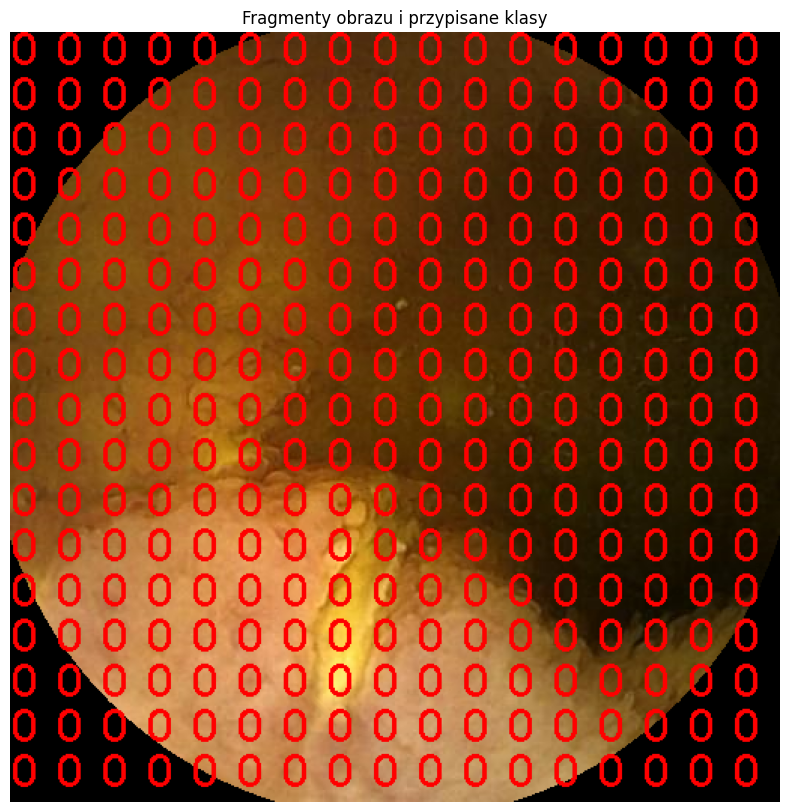

In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Wczytanie obrazu
full_image = cv2.imread("output\\Ulcer\\Ulcer_2024-08-07-08-30-18_61478.bmp")
h, w = full_image.shape[:2]

# Parametry okna
window_size = (100, 100)  # Wymiary okna
step_size = 30  # Krok przesuwania okna (np. co 30 px)

# Przesuwanie okna po obrazie
def sliding_window(image, step_size, window_size):
    for y in range(0, image.shape[0] - 1, step_size):
        for x in range(0, image.shape[1] -  1, step_size):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

# Przygotowanie modelu (tutaj załaduj swój model)
# model = load_your_model()

# Funkcja przetwarzania obrazu
def preprocess(img):
    # Konwersja obrazu do RGB (jeśli model używa RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Zmiana rozmiaru obrazu do rozmiaru oczekiwanego przez model (np. 224x224)
    img_resized = cv2.resize(img, (224, 224))  # Dostosuj rozmiar w zależności od modelu
    
    # Normalizacja obrazu, aby wartości były w przedziale [0, 1]
    img_normalized = img_resized / 255.0
    
    # Konwersja obrazu na tensor i zmianę wymiarów (C, H, W)
    img_tensor = torch.tensor(img_normalized, dtype=torch.float32)
    img_tensor = img_tensor.permute(2, 0, 1)  # Zmieniamy rozmiar na (C, H, W)
    
    # Dodanie wymiaru batcha (przyjmujemy, że model dostaje dane w formacie (1, C, H, W))
    img_tensor = img_tensor.unsqueeze(0)  # Zmiana na (1, C, H, W)
    
    return img_tensor

# Lista na przechowywanie wyników
predictions = []
colors=[]
# Wizualizacja
output_image = full_image.copy()

# Przesuwanie okna po obrazie
for (x, y, window) in sliding_window(full_image, step_size, window_size):
    # Przetwórz fragment obrazu (wstępna obróbka)
    processed_window = preprocess(window)  # np. zmiana rozmiaru, normalizacja

    # Ustawienie modelu w tryb ewaluacji (nie trenujemy, tylko predykcja)
    model.eval()

    # Przewidywanie fragmentu obrazu
    with torch.no_grad():  # Wyłączanie obliczania gradientów
        prediction = model(processed_window)  # Przechodzimy przez model

    # Jeśli model zwraca wyniki w postaci logits, możemy użyć np. torch.argmax, by uzyskać klasyfikację
    predicted_class = torch.argmax(prediction, dim=1).item()  # Zakładając, że mamy klasyfikację
    
    # Zapisz wynik (przewidywanie + współrzędne okna)
    predictions.append((predicted_class, (x, y, window)))
    
    # Określenie koloru na podstawie klasy
    if predicted_class == 0:  # Na przykład, 0 - zdrowy fragment
        color =  (0, 0, 255)  #AVM #czerwony
    elif predicted_class == 1:  # 1 - choroba Normal
        color =(0, 255, 0)#zielony
    elif predicted_class == 2:  # 2 - Ulcer
        color = (0, 255, 255)  # Żółty
    else:
        color = (255, 255, 255)  # Biały dla nieznanej klasy (jeśli istnieje taka opcja)
    colors.append(color)
    # Narysowanie prostokąta wokół analizowanego fragmentu
    #cv2.rectangle(output_image, (x, y), (x + window_size[0], y + window_size[1]), color, 2)

    # Można także dodać etykietę tekstową z nazwą klasy
    cv2.putText(output_image, str(predicted_class), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

# Wizualizacja wyników
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))  # Konwersja BGR na RGB dla poprawnego wyświetlania
plt.title("Fragmenty obrazu i przypisane klasy")
plt.axis('off')
plt.show()


In [77]:
full_image.shape, h , w

((512, 512, 3), 512, 512)